# **Customer Segmentation** 
Customer segmentation is the method of distributing a customer base into collections of people based on mutual characteristics so organizations can market to group efficiently and competently individually.

The purpose of segmenting customers is to determine how to correlate to customers in multiple segments to maximize customer benefits. Perfectly done customer segmentation empowers marketers to interact with every customer in the best efficient approach.

The data includes the following features:

1. Customer ID

2. Customer Gender

3. Customer Age

4. Annual Income of the customer (in Thousand Dollars)

5. Spending score of the customer (based on customer behaviour and spending nature)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Mall_Customers_1.csv")

In [3]:
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df['Gender'].describe()

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

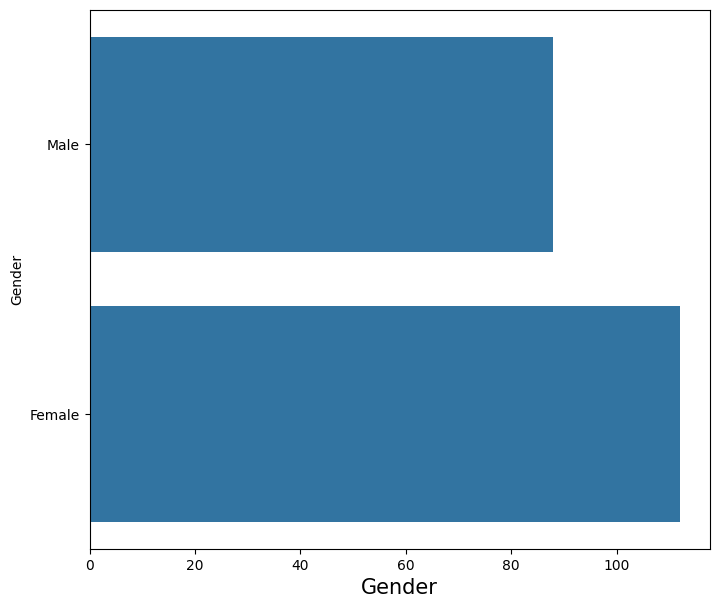

In [8]:
plt.figure(figsize=(8,7))
sns.countplot(df["Gender"])
plt.xlabel("Gender",fontsize = 15)
plt.show()

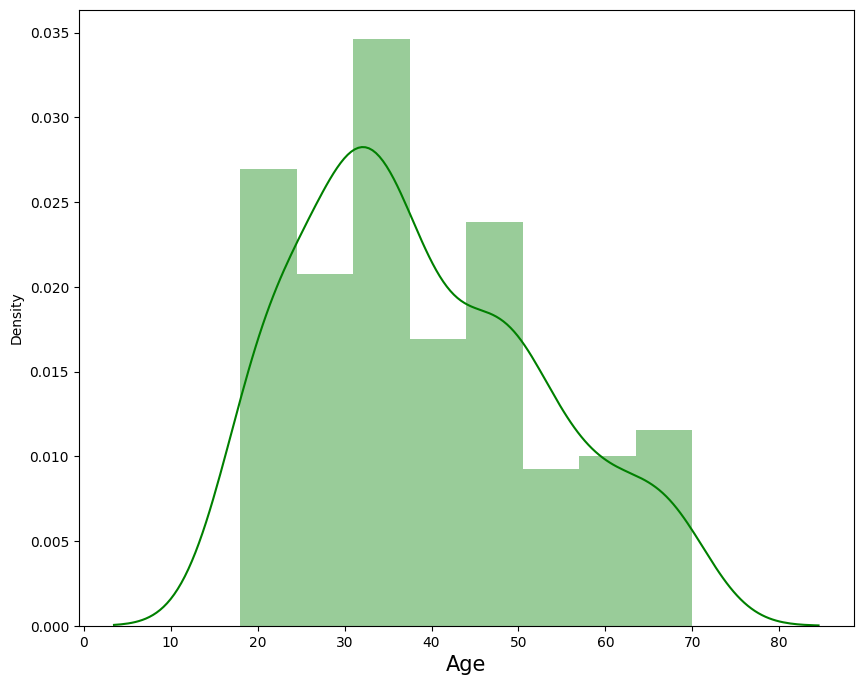

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(df["Age"],color = "Green")
plt.xlabel("Age",fontsize = 15)
plt.show()

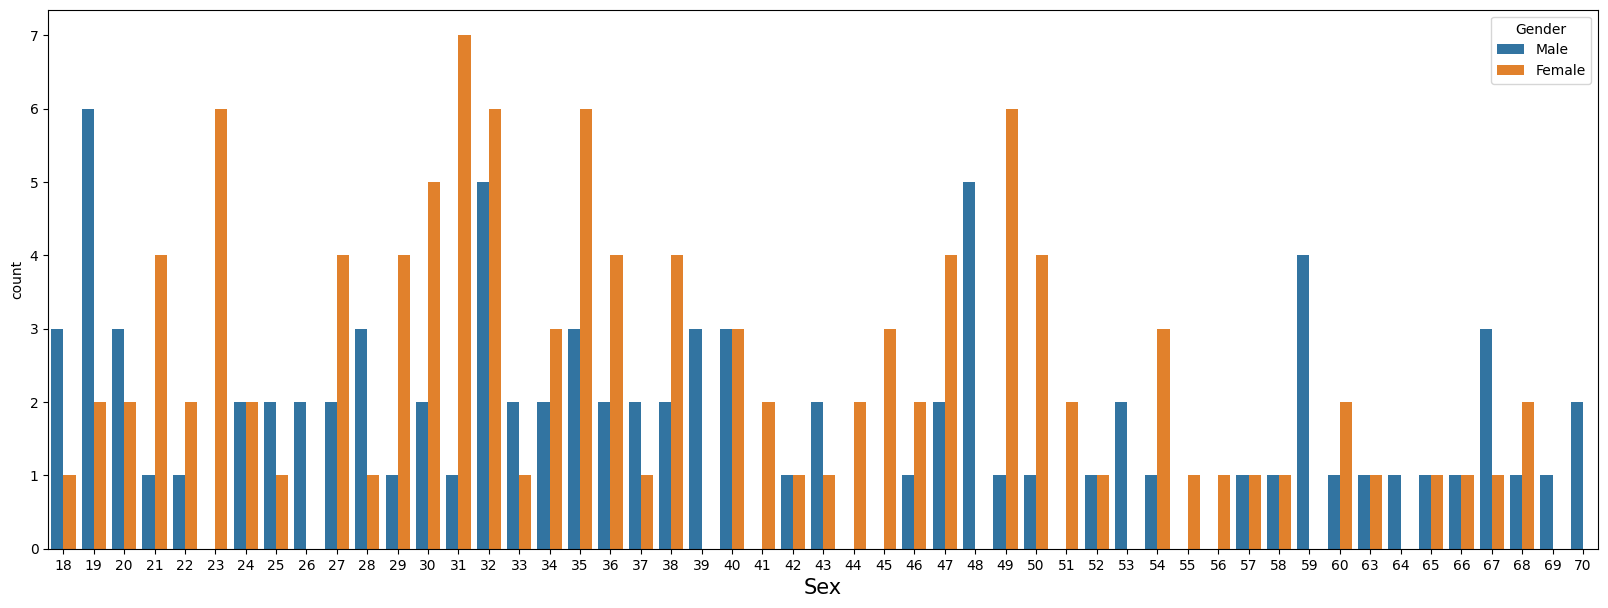

In [10]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,
              x = "Age",
              hue = "Gender")
plt.xlabel("Sex",fontsize = 15)
plt.show()

In [11]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [12]:
# drop the CustomerID Column not required
df.drop(columns = ["CustomerID"],axis=1,inplace = True)

In [13]:
df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


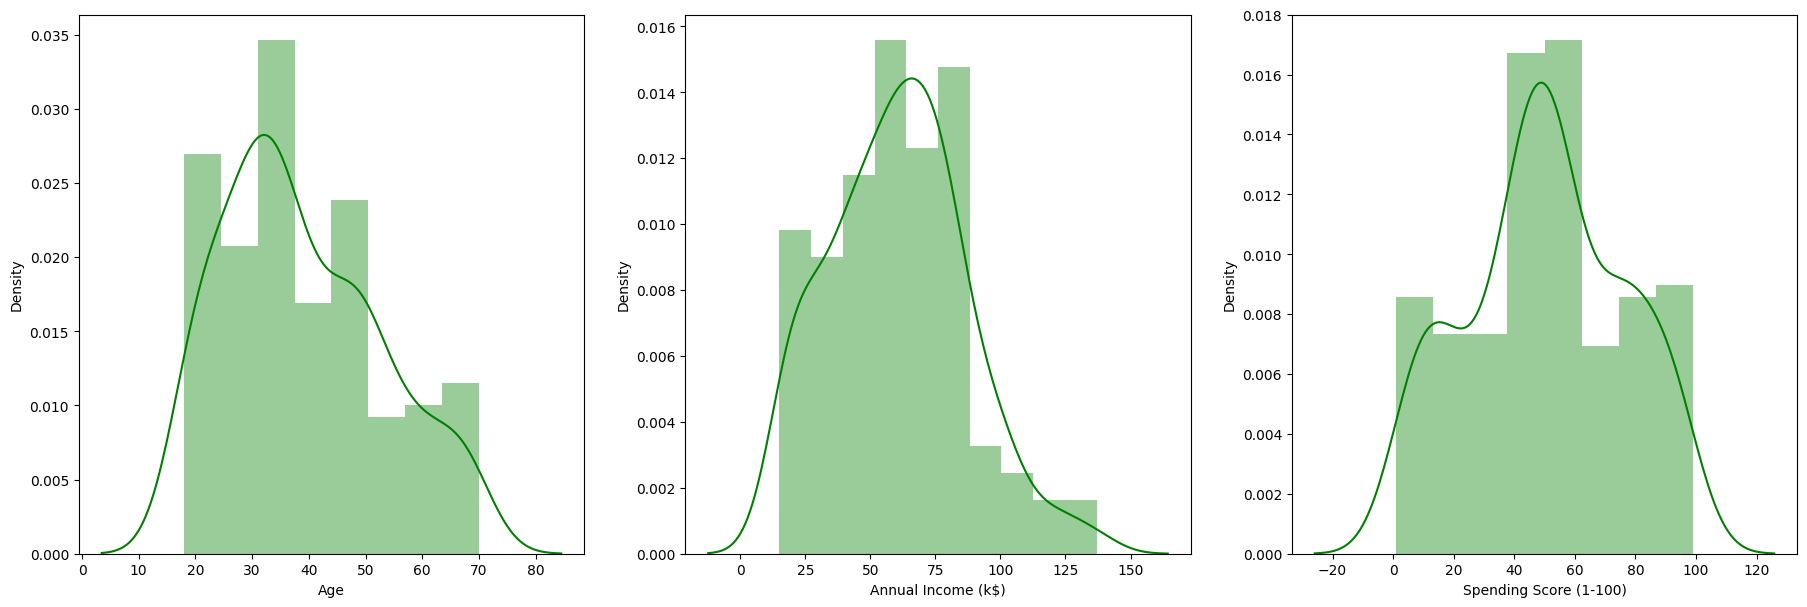

In [14]:
plt.figure(figsize=(30,7))
plotnumber = 1

for column in df.iloc[:,1:]:
  if plotnumber <= 8:
    ax = plt.subplot(1,4,plotnumber)
    sns.distplot(df[column],color = "green")
    plt.xlabel(column)
  plotnumber+=1
plt.show()

In [15]:
df['Annual Income (k$)'].loc[df['Gender']=='Female'].mean()

59.25

In [16]:
df['Annual Income (k$)'].loc[df['Gender']=='Male'].mean()

62.22727272727273

In [17]:
df.groupby('Gender').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [18]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [19]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


**Here we are Majorly focused on Annual Income and Spending Score**

In [20]:
df.iloc[:,[2,3]].columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [21]:
df.iloc[:,[2,3]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
X = df.iloc[:,[2,3]].values

In [23]:
X[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [24]:
type(X)

numpy.ndarray

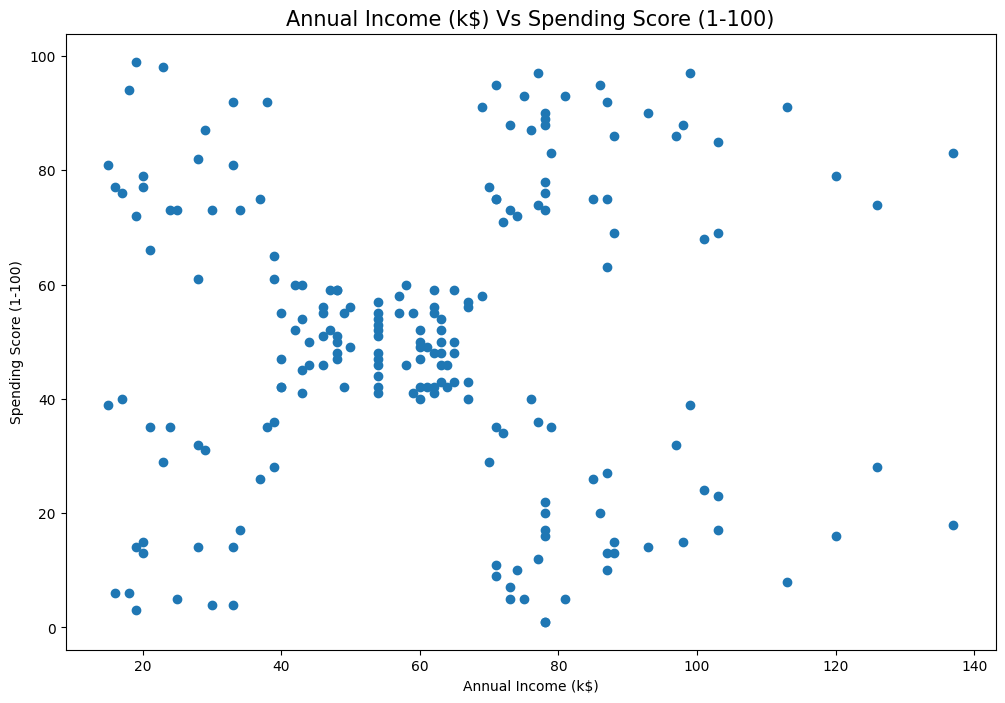

In [25]:
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income (k$) Vs Spending Score (1-100)",fontsize = 15)
plt.show()

### **Implementing KMeans Algorithm**

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print(kmeans.cluster_centers_) #no of centroids

[[79.6        50.12727273]
 [37.28888889 50.28888889]]


In [28]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


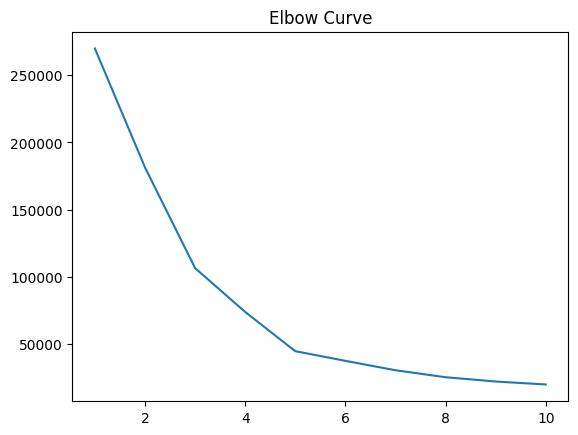

In [29]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 

In [30]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

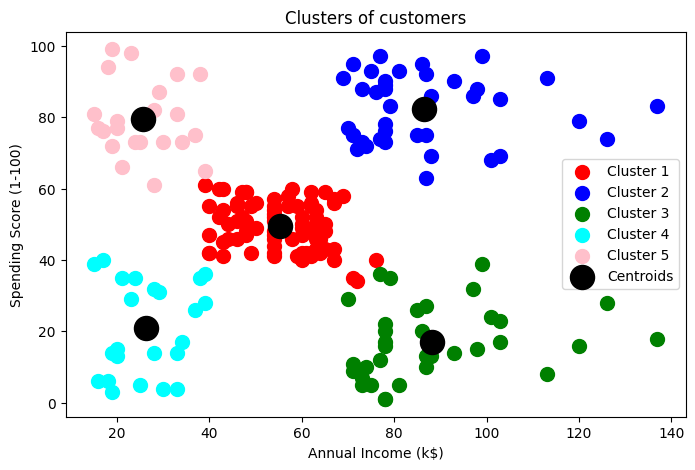

In [31]:
#Visualizing all the clusters 
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'pink', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()
